# Combined Recent Surveys
This notebook make predictions for the combined features and cross border predictions.

In [1]:
cd ..

c:\Users\Matteo\Desktop\GitHub\predicting-poverty-through-time\src


In [2]:
%autoreload 2
%load_ext autoreload
%matplotlib inline

UsageError: Line magic function `%autoreload` not found.


In [3]:
from lib import estimator_util as eu
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

In [4]:
sns.set_theme()

In [5]:
complete_df, all_cols = eu.get_data("../data/lsms/processed/_all_real.csv", "../data/cnn_features/resnet_trans_all_countries_hyper.csv", "../data/")

## Heatmap for cross country

In [6]:
countries = [["NG"], ["ETH"] ,["TZA"], ["MW"], ["NG", "ETH", "TZA", "MW"]]
arr = np.zeros((5,5))
for i, country in enumerate(countries):
    X, y = eu.get_recent_features(complete_df, country, all_cols)
    for j, out_country in enumerate(countries):
        X_out, y_out = eu.get_recent_features(complete_df, out_country, all_cols)
        r, _, m = eu.run_ridge_out(X, y, X_out, y_out)
        arr[i,j] = r

In [7]:
def heatmap(data):
    countries = ["Nigeria", "Ethiopia" ,"Tanzania", "Malawi", "Pooled"]
    df_cm = pd.DataFrame(data, index = countries, columns = countries)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cbar_kws={'label': r'$r^2$'})
    plt.xlabel("Country trained on")
    plt.ylabel("Country evaluated on")
    ax = plt.gca()
    plt.text(-0.1, 1.1, string.ascii_uppercase[0], size=20, weight='bold', transform=ax.transAxes)
    plt.savefig("../figs/cross_country_pooled.pdf", dpi=600, bbox_inches="tight")

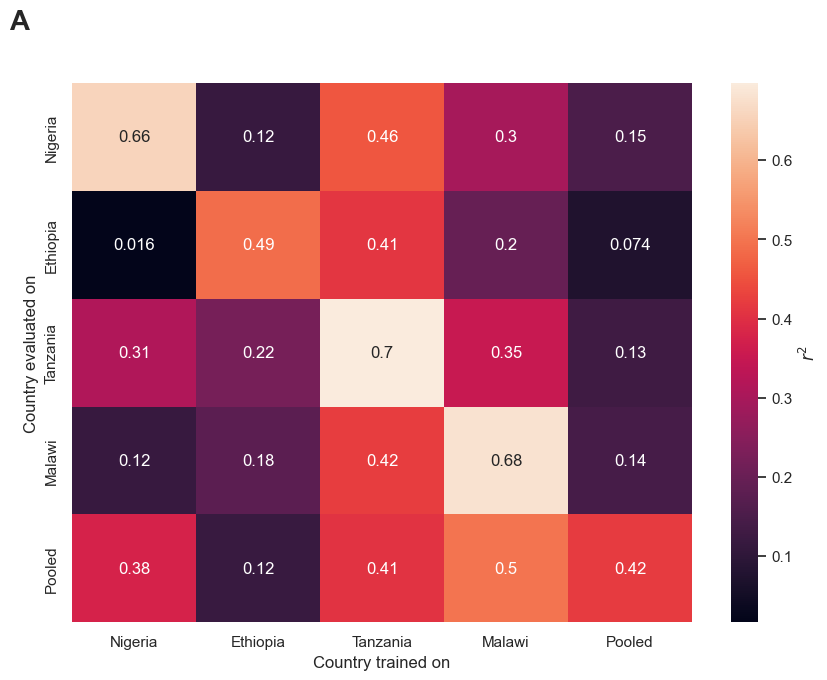

In [8]:
heatmap(arr)

## Pooled Dataset

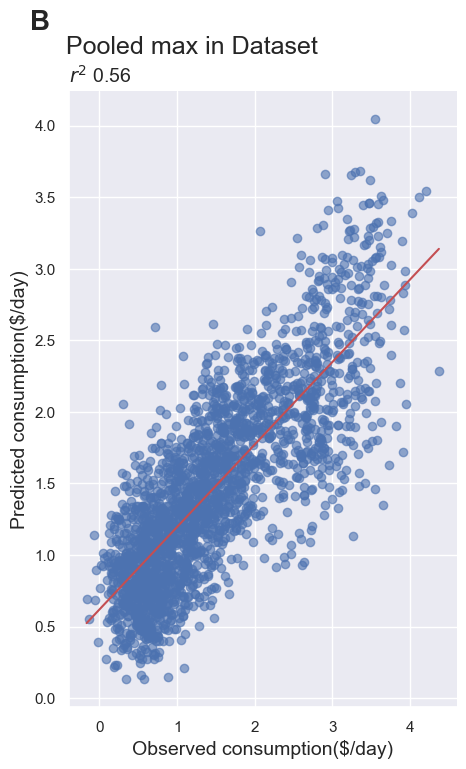

In [9]:
X, y = eu.get_recent_features(complete_df, ["NG", "ETH", "TZA", "MW"], all_cols, scale_cnn=False)
r2, y_hest, model = eu.run_ridge(X, y)
fig = eu.plot_predictions(y, y_hest,r2, "Pooled", "max in Dataset", 1, x_label=True)
plt.savefig("../figs/pooled_max_year.pdf", dpi=600, bbox_inches="tight")